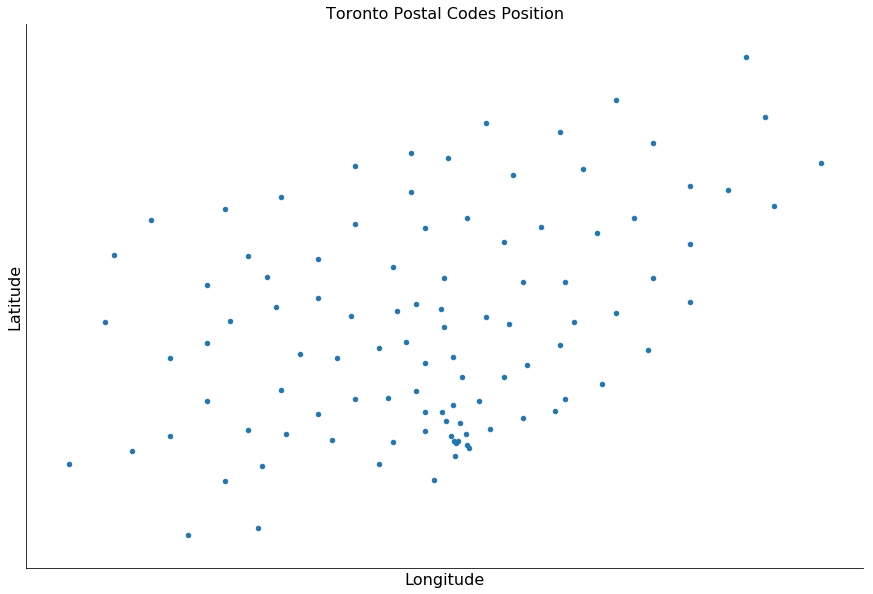

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

# Create the dataframe
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", header = 0)[0]
# Exclude unassigned Boroughs
df = tables[tables.Borough != 'Not assigned']
# From the assignment: More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
# From the assignment "If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park."
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# Get geographic data, and put into dataframe
geo_data_url = 'https://cocl.us/Geospatial_data'
geo_data_request = requests.get(geo_data_url).content
geo_data_merge = pd.read_csv(io.StringIO(geo_data_request.decode('utf-8')))
# Rename to merge on Postcode
geo_data_merge.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(geo_data_merge, df, on='Postcode')
# Re-order to look like the example
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
df

postcodes = df[['Longitude', 'Latitude']]

scatter_plot = postcodes.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Toronto Postal Codes Position', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()